In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
fields = ['P_ROKDYP',"P_N","P_POZIOM", # wartosci filtrujace
"P_E_ZAR_STUD_P5","P_E_ZAR_NSTUD_P5","P_E_ZAR_P5", #dane o zarobkach absolwentow po 5 latach
"P_E_ZAR_DOSW_P5","P_E_ZAR_NDOSW_P5",
"P_ME_ZAR_P5","P_ME_ZAR_DOSW_P5","P_ME_ZAR_NDOSW_P5",
"P_ME_ZAR_STUD_P5","P_ME_ZAR_NSTUD_P5",
"P_E_ZAR_ETAT_P5","P_E_ZAR_ETAT_DOSW_P5","P_E_ZAR_ETAT_NDOSW_P5",
"P_E_ZAR_ETAT_STUD_P5","P_E_ZAR_ETAT_NSTUD_P5",
"P_ME_ZAR_ETAT_P5","P_ME_ZAR_ETAT_DOSW_P5","P_ME_ZAR_ETAT_NDOSW_P5",
"P_ME_ZAR_ETAT_STUD_P5","P_ME_ZAR_ETAT_NSTUD_P5",
"P_WWZ_STUD_P5","P_WWZ_NSTUD_P5","P_WWZ_P5","P_WWZ_DOSW_P5","P_WWZ_NDOSW_P5",
'P_NAZWA_UCZELNI',"P_NAZWA_KIERUNKU_PELNA","P_KIERUNEK_ID","P_FORMA"] #dane o uczelni i kierunku
data1 = pd.read_csv('dane/graduates-major-data.csv',sep=";",usecols=fields,decimal=',')

In [44]:
# drobna redukcja pamieci na kolumnach o pewnych wartosciach
data1["P_ROKDYP"] = data1["P_ROKDYP"].astype('int16')
data1["P_KIERUNEK_ID"] = data1["P_KIERUNEK_ID"].astype('int32')
data1["P_N"] = data1["P_N"].astype('int16')
data1["P_POZIOM"] =data1["P_POZIOM"].astype("category")
# data1["P_FORMA"] =data1["P_POZIOM"].astype("category")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41792 entries, 0 to 41791
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   P_ROKDYP                41792 non-null  int16   
 1   P_KIERUNEK_ID           41792 non-null  int32   
 2   P_POZIOM                41792 non-null  category
 3   P_FORMA                 41792 non-null  object  
 4   P_N                     41792 non-null  int16   
 5   P_E_ZAR_STUD_P5         2736 non-null   float64 
 6   P_E_ZAR_NSTUD_P5        7194 non-null   float64 
 7   P_E_ZAR_P5              14190 non-null  float64 
 8   P_E_ZAR_DOSW_P5         9247 non-null   float64 
 9   P_E_ZAR_NDOSW_P5        10511 non-null  float64 
 10  P_ME_ZAR_STUD_P5        2736 non-null   float64 
 11  P_ME_ZAR_NSTUD_P5       7194 non-null   float64 
 12  P_ME_ZAR_P5             14190 non-null  float64 
 13  P_ME_ZAR_DOSW_P5        9247 non-null   float64 
 14  P_ME_ZAR_NDOSW_P5     

In [45]:
# dane o absolwentach z roku 2014 i 2015 roku 
data1 = data1[(data1['P_ROKDYP']==2014) | (data1['P_ROKDYP']==2015)]
# studia magisterskie lub jednolitemagisterskie
data1 = data1[(data1['P_POZIOM']=="JM") | (data1['P_POZIOM']=="2")]

In [46]:
# duzo pustych wartosci jesli chodzi o informacje 
temp = data1.isna().sum()
temp

P_ROKDYP                     0
P_KIERUNEK_ID                0
P_POZIOM                     0
P_FORMA                      0
P_N                          0
P_E_ZAR_STUD_P5           5013
P_E_ZAR_NSTUD_P5          3032
P_E_ZAR_P5                  16
P_E_ZAR_DOSW_P5           1541
P_E_ZAR_NDOSW_P5          1313
P_ME_ZAR_STUD_P5          5013
P_ME_ZAR_NSTUD_P5         3032
P_ME_ZAR_P5                 16
P_ME_ZAR_DOSW_P5          1541
P_ME_ZAR_NDOSW_P5         1313
P_E_ZAR_ETAT_STUD_P5      5097
P_E_ZAR_ETAT_NSTUD_P5     3037
P_E_ZAR_ETAT_P5             22
P_E_ZAR_ETAT_DOSW_P5      1677
P_E_ZAR_ETAT_NDOSW_P5     1492
P_ME_ZAR_ETAT_STUD_P5     5097
P_ME_ZAR_ETAT_NSTUD_P5    3037
P_ME_ZAR_ETAT_P5            22
P_ME_ZAR_ETAT_DOSW_P5     1677
P_ME_ZAR_ETAT_NDOSW_P5    1492
P_WWZ_STUD_P5             5013
P_WWZ_NSTUD_P5            3032
P_WWZ_P5                    16
P_WWZ_DOSW_P5             1541
P_WWZ_NDOSW_P5            1313
P_NAZWA_UCZELNI              0
P_NAZWA_KIERUNKU_PELNA       0
dtype: i

In [47]:
# data1 = data1.sort_values(by="P_KIERUNEK_ID").head()
# 1055 P_N 91+81 
# data1 = data1.groupby(["P_NAZWA_UCZELNI","P_NAZWA_KIERUNKU_PELNA"]).agg({
#     "P_N" :'sum', "P_E_ZAR_P5":'mean',
# })
# na razie dobrze sumuje, jeszcze ogarnac by zlaczyc uczelnie, zsumowalo studentow i usrednilo zarobki
#,"P_NAZWA_KIERUNKU_PELNA" id 8497 sumn 1378
data1 = data1.groupby(["P_NAZWA_UCZELNI","P_KIERUNEK_ID","P_NAZWA_KIERUNKU_PELNA","P_FORMA"]).agg({
    "P_N" :'sum',"P_E_ZAR_P5":'mean',"P_ME_ZAR_P5":'mean',"P_E_ZAR_ETAT_P5":'mean',"P_ME_ZAR_ETAT_P5":'mean',"P_ME_ZAR_P5":'mean',"P_WWZ_P5":'mean'
})

In [48]:
data1 = data1[(data1['P_N']>=30)]
test = data1.sort_values(by="P_E_ZAR_P5",ascending=False).iloc[:10]
test.reset_index()
# test[test["P_NAZWA_UCZELNI"] == "Politechnika Białostocka"].head()
##stop tu na razie

,P_NAZWA_UCZELNI,P_KIERUNEK_ID,P_NAZWA_KIERUNKU_PELNA,P_FORMA,P_N,P_E_ZAR_P5,P_ME_ZAR_P5,P_E_ZAR_ETAT_P5,P_ME_ZAR_ETAT_P5,P_WWZ_P5
0,Akademia Górniczo-Hutnicza im. Stanisława Stas...,13613,"Informatyka, studia stacjonarne drugiego stopn...",S,170,14338.935,15177.510,14729.985,15271.215,2.715
1,Akademia Górniczo-Hutnicza im. Stanisława Stas...,9637,"Informatyka stosowana, studia stacjonarne drug...",S,64,13557.190,12756.725,13809.405,13025.490,2.625
2,Uniwersytet Jagielloński w Krakowie,7851,"Informatyka, studia stacjonarne drugiego stopn...",S,89,13289.935,12326.155,13431.050,12345.180,2.525
3,Polsko-Japońska Akademia Technik Komputerowych,129464,"Informatyka, studia niestacjonarne drugiego st...",N,36,13197.790,13586.030,13191.160,13586.030,2.050
4,Politechnika Warszawska,122827,"Informatyka, studia stacjonarne drugiego stopn...",S,132,13053.660,13216.630,13232.415,13091.680,2.200
5,Polsko-Japońska Akademia Technik Komputerowych,2070,"Informatyka, studia niestacjonarne drugiego st...",N,43,12999.780,14264.420,12855.930,14264.420,2.210
6,Politechnika Warszawska,107604,"Informatyka, studia stacjonarne drugiego stopn...",S,84,12676.285,14038.355,13594.865,14665.190,2.160
7,Wyższa Szkoła Informatyki Stosowanej i Zarządz...,127181,"Zarządzanie, studia niestacjonarne drugiego st...",N,42,12493.655,9125.700,12507.370,9007.645,2.130
8,Polsko-Japońska Wyższa Szkoła Technik Komputer...,129464,"Informatyka, studia niestacjonarne drugiego st...",N,60,12482.410,12740.780,12272.910,12205.650,2.230
9,Uniwersytet Warszawski,6749,"Informatyka, studia stacjonarne drugiego stopn...",S,103,12385.465,11843.415,13445.020,13113.945,2.005


In [49]:
# ponad 2/3 w ponizszych kolumnach jest puste dlatego 
# zostana usuniete z tabeli
#data1.info()
#data1.isna().sum()
# kontrargument, te dane pozwalaja na sprawdzenie zarobkow doktorantow

# todrop = ["P_E_ZAR_STUD_P5","P_ME_ZAR_STUD_P5","P_E_ZAR_ETAT_STUD_P5","P_ME_ZAR_ETAT_STUD_P5"]
# data1 = data1.drop(columns=todrop)

In [50]:
avgdata1 = data1.sort_values(by=["P_E_ZAR_P5"],ascending=False)
avgdata1.groupby("P_NAZWA_KIERUNKU_PELNA").mean()

,P_N,P_E_ZAR_P5,P_ME_ZAR_P5,P_E_ZAR_ETAT_P5,P_ME_ZAR_ETAT_P5,P_WWZ_P5
P_NAZWA_KIERUNKU_PELNA,,,,,,
"Administracja, studia niestacjonarne drugiego stopnia, 3-semestralne, profil ogólnoakademicki",84.000000,3969.180000,3449.520000,3974.630000,3458.180000,0.870000
"Administracja, studia niestacjonarne drugiego stopnia, 4-semestralne, profil ogólnoakademicki",225.106383,4077.608191,3840.299894,4102.066809,3848.760851,0.868830
"Administracja, studia niestacjonarne drugiego stopnia, 4-semestralne, profil praktyczny",120.000000,4211.265000,4092.205000,4149.975000,4047.030000,0.895000
"Administracja, studia niestacjonarne drugiego stopnia, 5-semestralne, profil ogólnoakademicki",216.000000,4118.030000,3748.310000,4094.010000,3737.345000,0.870000
"Administracja, studia stacjonarne drugiego stopnia, 4-semestralne, profil ogólnoakademicki",187.307692,3966.395962,3786.711538,4028.808654,3822.339615,0.842692
...,...,...,...,...,...,...
"Zdrowie publiczne, studia stacjonarne drugiego stopnia, 4-semestralne, profil ogólnoakademicki",89.916667,3850.260833,3476.304583,3874.783333,3470.563333,0.804167
"Zootechnika, studia niestacjonarne drugiego stopnia, 3-semestralne, profil ogólnoakademicki",42.500000,3623.625000,3070.350000,3533.190000,3006.052500,0.822500
"Zootechnika, studia stacjonarne drugiego stopnia, 3-semestralne, profil ogólnoakademicki",104.571429,4045.318571,3710.975714,4179.270000,3793.927143,0.860714


In [51]:
avgbest10 = avgdata1.iloc[:10]
avgbest10 = avgbest10[["P_ROKDYP","P_NAZWA_KIERUNKU_PELNA","P_NAZWA_UCZELNI","P_E_ZAR_P5"]]
avgbest10

KeyError: "['P_NAZWA_KIERUNKU_PELNA', 'P_ROKDYP', 'P_NAZWA_UCZELNI'] not in index"

<AxesSubplot:xlabel='P_E_ZAR_P5', ylabel='P_NAZWA_KIERUNKU_PELNA'>

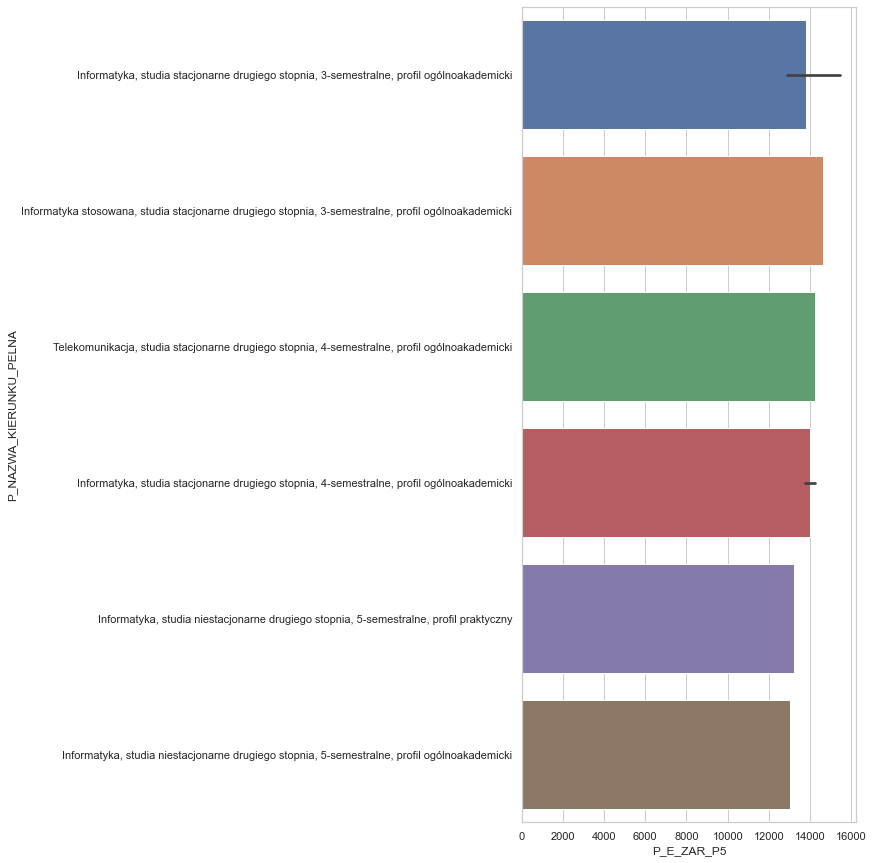

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x=avgbest10["P_E_ZAR_P5"],y=avgbest10["P_NAZWA_KIERUNKU_PELNA"])